# Data Analysis

## Contents
- [Data Handling - Quick Intro to Pandas](#pandas)
    - [Dataframes and Series](#dataframes)
    - [Reading Data](#readingdata)
    - [Saving Data](#savingdata)
    - [Values, columns, and index](#values)
    - [Accessing, slicing and dropping](#access)
    - [Describing the data](#describing)
    - [Data transformations](#transformations)
    - [Grouping](#grouping)
    - [Reshaping data](#reshaping)

- [Web Scrapping](#web)

- [Accessing Data Remotely](#remote)

- [Linear Regression](#regression)

<a name='dataframes'></a>
# Data Handling - Quick Intro to Pandas

Lets start by importing the package:

In [2]:
import pandas as pd

<a name='dataframes'></a>
## Dataframes and series

Let's start with the absolute basics. The most basic **pandas** object is a dataframe. A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data, even lists) in columns. DataFrame is a very important class inside pandas, that allows to structure data in a unified way. This class has  many interesting methods that can help transforme and analyze data.

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)


Series are even simple data structures that only have an index and values:

![](https://pandas.pydata.org/docs/_images/01_table_series.svg)


There are many ways in which one can create a dataframe: ndarray (structured or homogeneous), Iterable, dict, or DataFrame. It is quite flexible. Here is an example:

In [20]:
df = pd.DataFrame([1,2,3,4])
df.head()

,0
0,1
1,2
2,3
3,4


In [24]:
df = pd.DataFrame([1,2,3,4], columns=["var1"], index=['A','B','C','D'])
df.head()

,var1
A,1
B,2
C,3
D,4


The one I use most often to build a dataframe from scratch is with dictionaries:

In [27]:
df = pd.DataFrame({'var1': [1,2,3,4], 'var2': ['A','B','C','D']})
df.head()

,var1,var2
0,1,A
1,2,B
2,3,C
3,4,D


Similarly, you can create series:

In [34]:
series = pd.Series([1,2,3,4], index=['A','B','C','D'])
series

A    1
B    2
C    3
D    4
dtype: int64

<a name='readingdata'></a>
## Reading Data

In [3]:
# Lets start by reading a csv file

data = pd.read_csv('data/AirPassengers.csv')

# You can save it to many different data formats:
data.to_stata("data/AirPassengers.dta")
data.to_excel("data/AirPassengers.xlsx", index=False)
data.to_json("data/AirPassengers.json")

# Lets check the first 5 observations of the dataset
data.head()
#pd.DataFrame.head(data)

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


And if we want a bit more information about what we imported (including the datatypes of the columns):

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<a name='savingdata'></a>
## Saving Data

In [14]:
# You can also easily load data from many different data formats
data_json = pd.read_json('data/AirPassengers.json')
data_excel = pd.read_excel('data/AirPassengers.xlsx')
data_stata = pd.read_stata('data/AirPassengers.dta')
data_json.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


<a name='values'></a>
## Values, columns, and index

You'll have seen that there are three different things that make up a dataframe: the values that are in the cells, the column names, and the index. The column and index can take on values that are the same as the values in a dataframe do; string, int, float, datetime, and more.

In [38]:
data.values[:5]

array([['1/1/1949', 112],
       ['2/1/1949', 118],
       ['3/1/1949', 132],
       ['4/1/1949', 129],
       ['5/1/1949', 121]], dtype=object)

In [39]:
# an alternative way that looks a lot like Matlab is the iloc method
data.columns

Index(['TravelDate', 'Passengers'], dtype='object')

In [40]:
data.index

RangeIndex(start=0, stop=144, step=1)

You can change the index and columns at will

In [59]:
import numpy as np
data.index = ['b']*144
data.head()

,TravelDate,Passengers
b,1/1/1949,112
b,2/1/1949,118
b,3/1/1949,132
b,4/1/1949,129
b,5/1/1949,121


In [60]:
data.columns = ['A', 'B']
data.head()

,A,B
b,1/1/1949,112
b,2/1/1949,118
b,3/1/1949,132
b,4/1/1949,129
b,5/1/1949,121


In [62]:
data = pd.read_csv('data/AirPassengers.csv')

#### Index when working with time series

In [75]:
data.index = data['TravelDate']
data.head()

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
2/1/1949,2/1/1949,118
3/1/1949,3/1/1949,132
4/1/1949,4/1/1949,129
5/1/1949,5/1/1949,121


Note that the index is not in any format. You can check this.

In [81]:
data.index

Index(['1/1/1949', '2/1/1949', '3/1/1949', '4/1/1949', '5/1/1949', '6/1/1949',
       '7/1/1949', '8/1/1949', '9/1/1949', '10/1/1949',
       ...
       '3/1/1960', '4/1/1960', '5/1/1960', '6/1/1960', '7/1/1960', '8/1/1960',
       '9/1/1960', '10/1/1960', '11/1/1960', '12/1/1960'],
      dtype='object', name='TravelDate', length=144)

As you can see, dtype='object'. If you want to work with time series we need to transform it to dtype='datetime64[ns]'. 

In [91]:
dates = pd.to_datetime(data.index)
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

In [97]:
data.index = dates
data.head()

,TravelDate,Passengers
TravelDate,,
1949-01-01,1/1/1949,112
1949-02-01,2/1/1949,118
1949-03-01,3/1/1949,132
1949-04-01,4/1/1949,129
1949-05-01,5/1/1949,121


In [98]:
data.index = dates.strftime("%d/%m/%y")
data.head()

,TravelDate,Passengers
TravelDate,,
01/01/49,1/1/1949,112
01/02/49,2/1/1949,118
01/03/49,3/1/1949,132
01/04/49,4/1/1949,129
01/05/49,5/1/1949,121


You can check all available dates format [here](https://strftime.org/).

<a name='access'></a>
## Accessing, slicing and dropping

Now you know how to put data in a dataframe, how do you access the bits of it you need? There are various ways. If you want to access an entire column, the syntax is very simple; `df['columname']` (you can also use `df.columname`).

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)




In [63]:
data['Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [64]:
data[['TravelDate', 'Passengers']]

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


To access a particular row, it's `df.loc['rowname']` or `df.loc[['rowname1', 'rowname1']]`.

![](https://pandas.pydata.org/docs/_images/03_subset_rows.svg)


In [69]:
data.loc[1]

TravelDate    2/1/1949
Passengers         118
Name: 1, dtype: object

In [71]:
data.loc[[1,2]]

,TravelDate,Passengers
1,2/1/1949,118
2,3/1/1949,132


There are the different ways to get the column of a dataframe (the dataframe is `df`):

- `df.column`
- `df["column"]`
- `df.loc[:, "column"]`
- `df.iloc[:, 0]`

The ways to access rows are similar (here assuming the first row is called `row`):

- `df.loc["row", :]`
- `df.iloc[0, :]`

And to access the first value (ie the value in first row, first column):

- `df.column[0]`
- `df["column"][0]`
- `df.iloc[0, 0]`
- `df.loc["row", "column"]`

The syntax for slicing is similar to what we've seen already: there are two methods `.loc` to access items by name, and `.iloc` to access them by position. The syntax for the former is `df.loc[start:stop:step, start:stop:step]`, where the first position is index name and the second is column name (and the same applies for numbers and `df.iloc`). 

In [72]:
data.loc[1:2, "TravelDate":"Passengers"]

,TravelDate,Passengers
1,2/1/1949,118
2,3/1/1949,132


In [74]:
data.iloc[1:2, 0:1]

,TravelDate
1,2/1/1949


#### Dropping

In [23]:
# To drop a variable
data.drop(labels='TravelDate', axis=1).head(5)

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


In [24]:
# To drop an observation
data.drop(['2/1/1949', '4/1/1949'], axis=0).head(5)

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
3/1/1949,3/1/1949,132
5/1/1949,5/1/1949,121
6/1/1949,6/1/1949,135
7/1/1949,7/1/1949,148


<a name='describing'></a>
## Describing the Data

In [5]:
#help(pd.DataFrame.describe)

data.describe(include='all')

,TravelDate,Passengers
count,144,144.000000
unique,144,NaN
top,2/1/1956,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


In [6]:
# A great feature of Pandas is that simililarly to the symbol $ in R, 
# each variable becomes an attribute to the dataframe.
data.Passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

#### Plotting

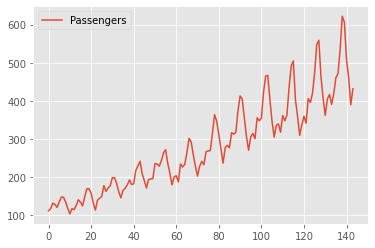

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Make the graphs a bit prettier

data = pd.read_csv('data/AirPassengers.csv')
data.plot()
plt.show()

#### Aggregators

In [7]:
data['Passengers'].mean()

280.2986111111111

In [10]:
data['Passengers'].value_counts()

229    3
405    2
355    2
315    2
318    2
      ..
104    1
356    1
606    1
342    1
359    1
Name: Passengers, Length: 118, dtype: int64

<a name='transformations'></a>
## Data transformations

Columns in dataframes can undergo all the usual arithmetic operations you'd expect of addition, multiplication, division, and so on. If the underlying datatypes of two columns have a group operation, then the dataframe columns will use that. 

![](https://github.com/pandas-dev/pandas/raw/059c8bac51e47d6eaaa3e36d6a293a22312925e6/doc/source/_static/schemas/05_newcolumn_1.svg)

The results of these manipulations can just be saved as a new series, eg, `new_series = df['A'] + df['B']` or created as a new column of the dataframe:

In [13]:
import numpy as np
log_data = data.copy()

log_data['Log Passengers'] = np.log(data['Passengers'])

In [15]:
log_data.head(5)

,TravelDate,Passengers,Log Passengers
0,1/1/1949,112,4.718499
1,2/1/1949,118,4.770685
2,3/1/1949,132,4.882802
3,4/1/1949,129,4.859812
4,5/1/1949,121,4.795791


In [16]:
log_data['Passengers']+ log_data['Log Passengers']

0      116.718499
1      122.770685
2      136.882802
3      133.859812
4      125.795791
          ...    
139    612.406880
140    514.230481
141    467.133398
142    395.966147
143    438.068426
Length: 144, dtype: float64

With time series you can use the datetime object to perform a lot of useful transformations

In [17]:
# Now we are able to use a couple of useful things
dates = pd.to_datetime(data.index)
data.index = dates
print(data.index.month)
print(data.index.weekday) # where 0 is Monday

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=144)
Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=144)


In [18]:
# Now we can add it as a variable to our dataset
data['weekday'] = data.index.weekday
data[:5]

,TravelDate,Passengers,weekday
1970-01-01 00:00:00.000000000,1/1/1949,112,3
1970-01-01 00:00:00.000000001,2/1/1949,118,3
1970-01-01 00:00:00.000000002,3/1/1949,132,3
1970-01-01 00:00:00.000000003,4/1/1949,129,3
1970-01-01 00:00:00.000000004,5/1/1949,121,3


<a name='grouping'></a>
## Grouping 

In [35]:
import numpy as np
weekday_counts = data.groupby('weekday').aggregate(np.mean)

In [36]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts
#weekday_counts.to_latex("my_table.tex")

,Passengers
Monday,290.947368
Tuesday,270.130435
Wednesday,285.421053
Thursday,271.952381
Friday,296.714286
Saturday,268.300000
Sunday,280.523810


### Exercise 14.1

- Read in the data from the following link: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv. Take a look at the data. Describe it.
- Check the last 5 observations of the dataset.
- Create a new data frame with only wages. 
- Transform wages into log wages.
- Save your log wages data into an excel file.
- Compute the average wages for each sex.
- Group all variables average by sex.
- Count how many female there are in the dataset.

<a name='reshaping'></a>
## Reshaping data

The main options for reshaping data are `pivot`, `melt`, `stack`, `unstack`, `pivot_table`, `get_dummies`, `cross_tab`, and `explode`. We’ll look at some of these here.



### Pivoting data from tidy to, err, untidy

At the start of this chapter, I said you should use tidy data--one row per observation, one column per variable--whenever you can. But there are times when you will want to take your lovingly prepared tidy data and pivot it into a wider format. `pivot` and `pivot_table` help you to do that.

![](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

This can be especially useful for time series data, where operations like `shift` or `diff` are typically applied assuming that an entry in one row follows (in time) from the one above. Here's an example:

In [19]:
data = {'value': np.random.randn(20),
        'variable': ['A']*10 + ['B']*10,
        'date': (list(pd.date_range('1/1/2000', periods=10, freq='M')) +
                 list(pd.date_range('1/1/2000', periods=10, freq='M')))}
df = pd.DataFrame(data, columns=['date', 'variable', 'value'])
df.sample(5)

,date,variable,value
0,2000-01-31,A,0.133170
15,2000-06-30,B,1.183384
8,2000-09-30,A,1.177028
13,2000-04-30,B,0.698238
3,2000-04-30,A,-1.176904


If we just run `shift` on this, it's going to shift variable B's and A's together. So we pivot to a wider format (and then we can shift safely).

In [20]:
df.pivot(index='date', columns='variable', values='value').shift(1)

variable,A,B
date,,
2000-01-31,NaN,NaN
2000-02-29,0.133170,-0.209928
2000-03-31,-0.126065,0.548582
2000-04-30,-1.169693,1.040556
2000-05-31,-1.176904,0.698238
2000-06-30,-0.713306,-0.805357
2000-07-31,1.884676,1.183384
2000-08-31,1.546550,0.252799
2000-09-30,1.181000,1.689073



### Melt

`melt` can help you go from untidy to tidy data (from wide data to long data), and is a *really* good one to remember. Of course, I have to look at the documentation every single time myself, but I'm sure you'll do better.

![](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

Here's an example of it in action:

In [21]:
df = pd.DataFrame({'first': ['John', 'Mary'],
                        'last': ['Doe', 'Bo'],
                        'height': [5.5, 6.0],
                        'weight': [130, 150]})
print('\n Unmelted: ')
print(df)
print('\n Melted: ')
df.melt(id_vars=['first', 'last'], var_name='quantity')


 Unmelted: 
  first last  height  weight
0  John  Doe     5.5     130
1  Mary   Bo     6.0     150

 Melted: 


,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


If you don't wan the headscratching of melt, there's also `wide_to_long`, which is really useful for typical data cleaning cases where you have data like this:

In [22]:
df = pd.DataFrame({"A1970": {0: "a", 1: "b", 2: "c"},
                   "A1980": {0: "d", 1: "e", 2: "f"},
                   "B1970": {0: 2.5, 1: 1.2, 2: .7},
                   "B1980": {0: 3.2, 1: 1.3, 2: .1},
                   "X": dict(zip(range(3), np.random.randn(3))),
                   "id": dict(zip(range(3), range(3))),
                  })
df

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,-0.959628,0
1,b,e,1.2,1.3,-0.838324,1
2,c,f,0.7,0.1,0.803575,2


i.e. data where there are different variables and time periods across the columns. Wide to long is going to let us give info on what the stubnames are ('A', 'B'), the name of the variable that's always across columns (here, a year), any values (X here), and an id column.

In [23]:
pd.wide_to_long(df, ['A', 'B'], i='id', j='year')

,,X,A,B
id,year,,,
0,1970,-0.959628,a,2.5
1,1970,-0.838324,b,1.2
2,1970,0.803575,c,0.7
0,1980,-0.959628,d,3.2
1,1980,-0.838324,e,1.3
2,1980,0.803575,f,0.1


### Stack and unstack

Stack, `stack()` is a shortcut for taking a single type of wide data variable from columns and turning it into a long form dataset, but with an extra index.

![](https://pandas.pydata.org/docs/_images/reshaping_stack.png)

Unstack, `unstack()` unsurprisingly does the same operation, but in reverse.

![](https://pandas.pydata.org/docs/_images/reshaping_unstack.png)

Let's define a multi-index dataframe to demonstrate this:

In [24]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.033537  0.047607
      two    -0.835368  0.896055
baz   one    -0.455574  2.132669
      two     0.252756 -1.805783
foo   one    -1.933827  0.779045
      two    -1.993291 -0.609702
qux   one    -0.371813  0.057015
      two    -0.064375  0.053637

Let's stack this to create a tidy dataset:

In [25]:
df = df.stack()
df

first  second   
bar    one     A   -1.033537
               B    0.047607
       two     A   -0.835368
               B    0.896055
baz    one     A   -0.455574
               B    2.132669
       two     A    0.252756
               B   -1.805783
foo    one     A   -1.933827
               B    0.779045
       two     A   -1.993291
               B   -0.609702
qux    one     A   -0.371813
               B    0.057015
       two     A   -0.064375
               B    0.053637
dtype: float64

Now let's see unstack but, instead of unstacking the 'A', 'B' variables we began with, let's unstack the 'first' column by passing `level=0` (the default is to unstack the innermost index). This diagram shows what's going on:

![](https://pandas.pydata.org/docs/_images/reshaping_unstack_0.png)

And here's the code:

In [26]:
df.unstack(level=0)

first          bar       baz       foo       qux
second                                          
one    A -1.033537 -0.455574 -1.933827 -0.371813
       B  0.047607  2.132669  0.779045  0.057015
two    A -0.835368  0.252756 -1.993291 -0.064375
       B  0.896055 -1.805783 -0.609702  0.053637


## Combining data

**pandas** has a really rich set of options for combining one or more dataframes. The two most important are concatenate and merge.

### Concatenate

If you have two or more dataframes with the same index or the same columns, you can glue them together into a single dataframe using `pd.concat`. 

![](https://pandas.pydata.org/docs/_images/08_concat_row.svg)

For the same columns, pass `axis=0` to glue the index together; for the same index, pass `axis=1` to glue the columns together. The concatenate function will typically be used on a list of dataframes.

If you want to track where the original data came from in the final dataframe, use the `keys` keyword.

Here's an example using data on two different states' populations that also makes uses of the `keys` option:

In [27]:
base_url = 'http://www.stata-press.com/data/r14/'
state_codes = ['ca', 'il']
end_url = 'pop.dta'

# This grabs the two dataframes, one for each state
list_of_state_dfs = [pd.read_stata(base_url + state + end_url) for state in state_codes]

# Concatenate the list of dataframes
df = pd.concat(list_of_state_dfs, keys=state_codes, axis=0)
df

county      pop
ca 0  Los Angeles  9878554
   1       Orange  2997033
   2      Ventura   798364
il 0         Cook  5285107
   1       DeKalb   103729
   2         Will   673586

### Merge

There are so many options for merging dataframes using `pd.merge(left, right, on=..., how=...` that we won't be able to cover them all here. The most important features are: the two dataframes to be merged, what variables (aka keys) to merge on (and these can be indexes) via `on=`, and *how* to do the merge (eg left, right, outer, inner) via `how=`. This diagram shows an example of a merge using keys from the left-hand dataframe:

![](https://pandas.pydata.org/docs/_images/08_merge_left.svg)

The `how=` keyword works in the following ways:
- `how='left'` uses keys from the left dataframe only to merge.
- `how='right'` uses keys from the right dataframe only to merge.
- `how='inner'` uses keys that appear in both dataframes to merge.
- `how='outer'` uses the cartesian product of keys in both dataframes to merge on.

Let's see examples of some of these:

In [28]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
# Right merge
pd.merge(left, right, on=['key1', 'key2'], how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


Note that the key combination of K2 and K0 did not exist in the left-hand dataframe, and so its entries in the final dataframe are NaNs. But it *does* have entries because we chose the keys from the right-hand dataframe.

What about an inner merge?

In [29]:
pd.merge(left, right, on=['key1', 'key2'], how='inner')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


Now we see that the combination K2 and K0 are excluded because they didn't exist in the overlap of keys in both dataframes.

Finally, let's take a look at an outer merge that comes with some extra info via the `indicator` keyword:

In [30]:
pd.merge(left, right, on=['key1', 'key2'], how='outer', indicator=True)

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
5,K2,K0,NaN,NaN,C3,D3,right_only


Now we can see that the products of all key combinations are here. The `indicator=True` option has caused an extra column to be added, called '_merge', that tells us which dataframe the keys on that row came from.

For more on the options, see the **pandas** [merging documentation](https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging).

<a name='web'></a>
## Web scrapping

The web has sometimes an address with data or an API. Other times, the url does not point to any structured data, but we can scan its html code to get what we are interested

In [37]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv'
AirPassengers = pd.read_csv(url,index_col='time', parse_dates=True, encoding='latin1')
AirPassengers.drop(labels='Unnamed: 0', axis=1).head()
#AirPassengers.head(5)

,value
time,
1949-01-01,112
1949-01-01,118
1949-01-01,132
1949-01-01,129
1949-01-01,121


### Now let's do scrape IMDB

In [163]:
# First thing we need is to get the HTML info
from bs4 import BeautifulSoup
from requests import get

url = "https://www.imdb.com/search/title/?release_date=2017&sort=num_votes,desc&page=1"
response = get(url)
response.text[:500]
# We can use google chrome to identify objects we are interested in the HTML structure
# the rating of this moving is in <span itemprop="ratingValue">7.4</span>

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

### BeautifulSoup to parse the HTML content

In [201]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [206]:
movie_rating = html_soup.find_all('div', class_="inline-block ratings-imdb-rating")[0]
#print(len(movie_rating))
score = movie_rating.select('strong')[0].text

In [207]:
movie_rating

<div class="inline-block ratings-imdb-rating" data-value="8.1" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>8.1</strong>
</div>

In [208]:
score

'8.1'

In [211]:
# Suppose we want the year of the movie as well - <a href="/year/2017/?ref_=tt_ov_inf">2017</a>
movie_year = html_soup.find_all('span', class_="lister-item-year text-muted unbold")[0]
movie_year.text

'(2017)'

### Exercise 14.2

- Use the search url of IMDB (http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1) and get the top 50 movies Titles and their ratings. Then save it in a latex file.

In [195]:
#answers 13.2

<a name='remote'></a>
## Accessing Data Remotely - Pandas DataReader

First install pandas_datareader. Open a new terminal and type:

`pip install pandas-datareader`

or 

`conda install pandas-datareader`

and

`pip install git+https://github.com/pydata/pandas-datareader.git`

to update it to its latest version.

### FRED

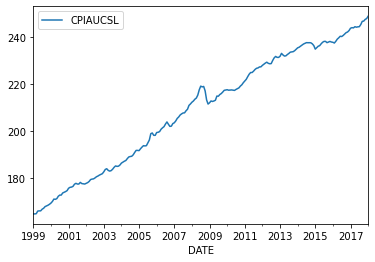

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1999, 1, 1)

end = datetime.datetime(2018, 1, 27)

data = web.DataReader('CPIAUCSL', 'fred', start, end)
data.plot()
plt.show()

### World Bank

Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if you wanted to compare the Gross Domestic Products per capita in constant dollars in North America, you would use the search function:

In [224]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9260,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9262,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9264,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9265,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [225]:
data = wb.download(indicator='NY.GDP.PCAP.KD', country=['USA', 'CAN', 'MX', 'PT'], start=2005, end=2008)

data

NY.GDP.PCAP.KD
country       year                
Canada        2008    48495.204040
              2007    48534.174477
              2006    45857.996552
              2005    44471.080060
Mexico        2008     9587.636339
              2007     9622.047957
              2006     9547.333571
              2005     9270.656542
Portugal      2008    22859.369322
              2007    22819.503523
              2006    22305.244487
              2005    21988.188787
United States 2008    49319.478865
              2007    49856.281490
              2006    49405.767296
              2005    48499.812374

In [232]:
wb.search('cell.*%')

,id,name,unit,source,sourceNote,sourceOrganization,topics
7560,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%),,WDI Database Archives,Population covered by a mobile-cellular networ...,"b'International Telecommunication Union, World...",
7615,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...,,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",


In [243]:
ind = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
dat = wb.download(indicator=ind, country='all', start=2010, end=2011)
dat.columns = ['gdp', 'cellphone']
dat

gdp  cellphone
country                        year                         
Arab World                     2011   6021.905038        NaN
                               2010   5946.380950        NaN
Caribbean small states         2011   9102.493704        NaN
                               2010   9074.324391        NaN
Central Europe and the Baltics 2011  13015.351612        NaN
...                                           ...        ...
Uganda                         2010           NaN      100.0
Zambia                         2011           NaN       62.0
                               2010           NaN       90.0
Zimbabwe                       2011           NaN       72.4
                               2010           NaN       61.0

[648 rows x 2 columns]

### IEX Finance (NOW REQUIRES API KEY)

In [227]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2015, 2, 9)

end = datetime(2018, 8, 29)

#apple = web.DataReader('AAPL', 'iex', start, end)

## API - JSON

### Eurostat

[Eurostat Query Builder](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder)

![](./image.png)

In [12]:
import requests, json
import io

euro_stat_vars = ['B1GQ']
labels = ['GDP']

url_base = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
data_base = 'namq_10_gdp'
variable = 'B1GQ'
geo = 'EA12'
url = url_base + data_base +  '?na_item=' + variable + '&precision=1&geo=' + geo + '&unit=CLV_I10&s_adj=SCA&time=1999Q4&time=2000Q1&time=2000Q2&time=2000Q3&time=2000Q4&time=2001Q1&time=2001Q2&time=2001Q3&time=2001Q4&time=2002Q1&time=2002Q2&time=2002Q3&time=2002Q4&time=2003Q1&time=2003Q2&time=2003Q3&time=2003Q4&time=2004Q1&time=2004Q2&time=2004Q3&time=2004Q4&time=2005Q1&time=2005Q2&time=2005Q3&time=2005Q4&time=2006Q1&time=2006Q2&time=2006Q3&time=2006Q4&time=2007Q1&time=2007Q2&time=2007Q3&time=2007Q4&time=2008Q1&time=2008Q2&time=2008Q3&time=2008Q4&time=2009Q1&time=2009Q2&time=2009Q3&time=2009Q4&time=2010Q1&time=2010Q2&time=2010Q3&time=2010Q4&time=2011Q1&time=2011Q2&time=2011Q3&time=2011Q4&time=2012Q1&time=2012Q2&time=2012Q3&time=2012Q4&time=2013Q1&time=2013Q2&time=2013Q3&time=2013Q4&time=2014Q1&time=2014Q2&time=2014Q3&time=2014Q4&time=2015Q1&time=2015Q2&time=2015Q3&time=2015Q4&time=2016Q1&time=2016Q2&time=2016Q3&time=2016Q4&time=2017Q1&time=2017Q2&time=2017Q3&time=2017Q4&time=2018Q1&time=2018Q2&time=2018Q3&time=2018Q4&time=2019Q1&time=2019Q2&time=2019Q3&time=2019Q4'
r = requests.get(url)
data_json = json.loads(r.text)
data = pd.DataFrame(list(data_json['value'].values()), columns=['GDP'], index = list(data_json['dimension']['time']['category']['index'].keys()))
data

,GDP
1999Q4,87.423
2000Q1,88.492
2000Q2,89.283
2000Q3,89.780
2000Q4,90.376
...,...
2018Q4,111.282
2019Q1,111.763
2019Q2,112.028
2019Q3,112.252


---

<a name='regression'></a>
# Linear Regression

You can do regression analysis with many alternative functions/classes in python. Two well documented modules are:

- StatsModels

- scikit-learn

The first one is a more classical approach to regression while the second library is a machine learning module that includes regression.

#### Define your own OLS class

Suppose we have the following linear model:

$$ Y = X\beta + \epsilon$$

where $Y$ is an $n\times 1$ vector, X is an $n\times k$ matrix, $\beta$ is an $k \times 1$ vector, and $\epsilon$ is an $n \times 1 $ vector.

The OLS estimator is given by:

$$ \hat{\beta}_{OLS} = (X'X)^{-1}X'Y$$

$$ \hat{\epsilon} = Y - X \hat{\beta}_{OLS}$$

### Exercise 14.3

1. Write a function that given data estimates the coefficients by OLS.
2. Write a function that given data and OLS estimates gives the residuals.
3. Write a OLS class that has as atributes the OLS coefficients and the residuals.

In [261]:
import pandas as pd

import numpy as np

import statsmodels.api as sm # more natural for Matlab users

import statsmodels.formula.api as smf # more natural for R users

# Load data
dat = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv')

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('wage ~ exper', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Fri, 26 Jun 2020   Prob (F-statistic):            0.00318
Time:                        14:37:18   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1678      0.208     24.875      0.0

Alternatively, we could use arrays directly instead of a formula:

In [260]:
X = dat['exper']

X = sm.add_constant(X)

y = dat['wage']

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Fri, 26 Jun 2020   Prob (F-statistic):            0.00318
Time:                        14:36:33   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1678      0.208     24.875      0.0

### Exercise 14.4

- Get unemployment and inflation (consumer price) annual data from 1960 to 2016. Download the data from FRED either manually or download it using the datareader. 

- Do a scatter plot of inflation and unemployment.

- Regress inflation on unemployment. Use both statsmodels and your own OLS class.

- Plot the regression line fit on top of the scatter plot.
